<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/RecencyFrequencyMonetaryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RFM Analysis on the 'Germany' Dataset (PyCaret inbuilt dataset)

1. Load the dataset, undertake preliminary exploration of dataset
2. Calculate monetary value, frequency and recency of the customer's interactions with the store
3. Assign RFM score: then assign appropriate RFM label like 'Loyalists', target for email promotion, target for instore promotion etc
4. Attempt Customer Segmentation and determine future Marketing/Promotional activities

RFM analysis quantitatively groups customers based on the recency, frequency and monetary value of transactions with a store or marketplace.
RFM analysis is used to inform marketing campaigns and targeting for promotions etc.

#Load the dataset

In [1]:
#we are installing pycaret to retrieve an inbuilt dataset into colab
!pip install pycaret -q

In [2]:
import pandas as pd

In [3]:
#we import get_data
from pycaret.datasets import get_data
#we load the 'germany' dataset from PyCaret
data = get_data('germany')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [4]:
data['Country'].value_counts()

,count
Country,
Germany,9495


In [5]:
data.shape

(9495, 8)

In [11]:
#We get the total price per transaction
data['Price'] = data['Quantity']*data['UnitPrice']

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662,Germany,17.7
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662,Germany,15.3
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662,Germany,10.2
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662,Germany,19.8
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662,Germany,23.4


In [13]:
#we examine the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9495 non-null   object        
 1   StockCode    9495 non-null   object        
 2   Description  9495 non-null   object        
 3   Quantity     9495 non-null   int64         
 4   InvoiceDate  9495 non-null   datetime64[ns]
 5   UnitPrice    9495 non-null   float64       
 6   CustomerID   9495 non-null   int64         
 7   Country      9495 non-null   object        
 8   Price        9495 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 667.7+ KB


In [14]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Price
count,9495.000000,9495,9495.000000,9495.000000,9495.000000
mean,12.369458,2011-07-03 14:23:10.331753472,3.966930,12646.139336,23.348943
min,-288.000000,2010-12-01 13:04:00,0.000000,12426.000000,-599.500000
25%,5.000000,2011-04-04 12:10:00,1.250000,12480.000000,11.100000
50%,10.000000,2011-07-19 15:55:00,1.950000,12592.000000,16.600000
75%,12.000000,2011-10-11 12:38:00,3.750000,12662.000000,23.400000
max,600.000000,2011-12-09 12:16:00,599.500000,14335.000000,876.000000
std,17.865719,NaN,16.549026,309.138487,37.324826


In [15]:
#we convert InvoiceDate to a datetime object
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662,Germany,17.7
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662,Germany,15.3


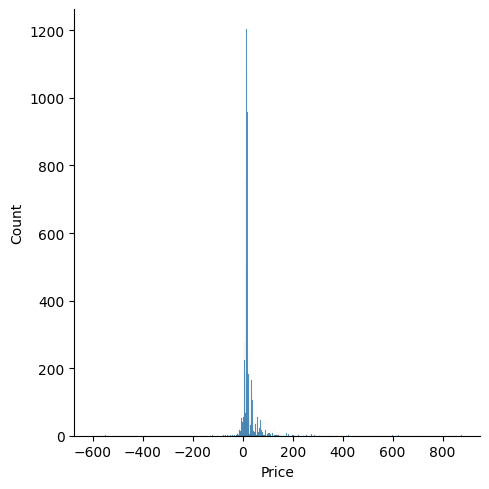

In [16]:
#We examine the histogram for the Price variable
import seaborn as sns
sns.displot(x=data['Price'])

<Axes: xlabel='Price'>

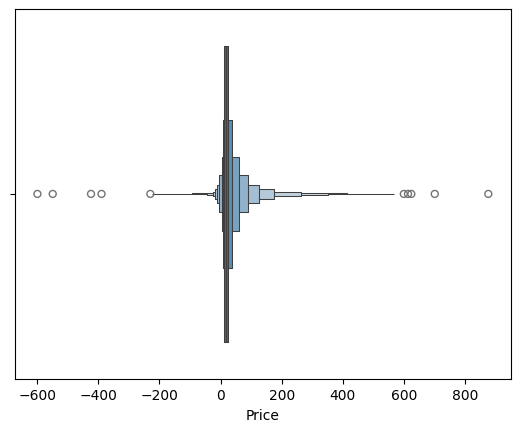

In [17]:
#we generate a boxenplot for the price
sns.boxenplot(x=data['Price'])

In [ ]:
data.shape

#Identify the monetary, recency and frequency of transactions

In [18]:
#we check to see the latest transaction in the dataset
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:16:00')

In [19]:
#we set the latest date
import datetime as dt
LATESTDATE = dt.datetime(2011,12, 10)

In [20]:
#We use pandas groupby to transfer over the CustomerID for further use
#We get the total sum of the transactions undertaken by one CustomerID and store it in Price (Monetary Value)
#We get the date from the latestdate to identify the Recency (latestdate - maxinvoice so we can know the total of numbers days)
#We then get the number of invoices per CustomerID to identify the monetary value
rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (LATESTDATE - InvoiceDate.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Price': lambda Price: Price.sum()})

In [21]:
#we generate the new table called rfm
rfm

,InvoiceDate,InvoiceNo,Price
CustomerID,,,
12426,194,30,582.73
12427,11,35,708.37
12468,143,40,724.04
12471,2,531,18740.92
12472,30,391,6229.48
...,...,...,...
13814,56,58,1562.12
13815,22,177,4014.91
13816,23,33,555.04


#Assign RFM Scoring

In [22]:
#We rename the columns to denote Recency, Frequency and Monetary for easier identification
rfm.columns=['recency','frequency','monetary']

In [23]:
rfm

,recency,frequency,monetary
CustomerID,,,
12426,194,30,582.73
12427,11,35,708.37
12468,143,40,724.04
12471,2,531,18740.92
12472,30,391,6229.48
...,...,...,...
13814,56,58,1562.12
13815,22,177,4014.91
13816,23,33,555.04


In [24]:
#pandas qcut is used to split the values in the columns
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [25]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12426,194,30,582.73,4,3,3
12427,11,35,708.37,1,3,3
12468,143,40,724.04,4,3,3
12471,2,531,18740.92,1,1,1
12472,30,391,6229.48,2,1,1


In [26]:
#An RFM score is then identified
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12426,194,30,582.73,4,3,3,433
12427,11,35,708.37,1,3,3,133
12468,143,40,724.04,4,3,3,433
12471,2,531,18740.92,1,1,1,111
12472,30,391,6229.48,2,1,1,211


In [27]:
rfm.sort_values('monetary', ascending=False).head(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12471,2,531,18740.92,1,1,1,111
12621,1,474,13612.07,1,1,1,111
12477,22,308,13117.01,2,1,1,211
12590,190,70,9861.38,4,2,1,421
12709,3,257,9294.10,1,1,1,111


In [28]:
rfm.sort_values('frequency', ascending=False).head(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12471,2,531,18740.92,1,1,1,111
12621,1,474,13612.07,1,1,1,111
12474,17,457,7116.47,2,1,1,211
12472,30,391,6229.48,2,1,1,211
12720,2,359,5713.28,1,1,1,111


In [29]:
rfm.sort_values('recency', ascending=True).head(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12662,0,232,3817.08,1,1,1,111
12526,0,71,1316.66,1,2,2,122
12518,0,124,2056.89,1,2,2,122
12713,0,38,848.55,1,3,3,133
12476,1,264,6546.58,1,1,1,111


In [31]:
rfm.sort_values('RFM_Score', ascending=True).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12476,1,264,6546.58,1,1,1,111
12668,7,168,3743.18,1,1,1,111
12705,15,348,6814.24,1,1,1,111
12471,2,531,18740.92,1,1,1,111
12662,0,232,3817.08,1,1,1,111
12709,3,257,9294.10,1,1,1,111
12627,10,230,4478.53,1,1,1,111
12621,1,474,13612.07,1,1,1,111
12524,9,144,4485.72,1,1,1,111


In [32]:
rfm.sort_values('RFM_Score', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12605,365,3,-7.50,4,4,4,444
12738,372,11,155.35,4,4,4,444
12665,324,4,61.75,4,4,4,444
12648,154,21,318.05,4,4,4,444
12623,276,18,305.10,4,4,4,444
12622,232,11,180.10,4,4,4,444
12614,277,20,315.60,4,4,4,444
12561,302,16,238.85,4,4,4,444
13811,183,14,591.75,4,4,3,443


In [33]:
rfm['RFM_Score_qual'] = rfm['RFM_Score']

In [46]:
import numpy as np
ordered = np.sort(rfm['RFM_Score'].unique())
ordered

array(['111', '121', '122', '123', '124', '133', '134', '144', '211',
       '212', '221', '222', '233', '234', '243', '244', '311', '312',
       '322', '332', '333', '342', '343', '344', '412', '421', '422',
       '433', '434', '443', '444'], dtype=object)

#Customer Segmentation using RFM values

In [47]:
#we use map to map certain values to ideal promotional strategies
rfm['RFM_Score_qual'] = rfm['RFM_Score_qual'].map({'111': 'Loyalists', '411': 'FollowUp',
                                                   '211': 'FollowUp', '311': 'FollowUp', '321':
                                                   'FollowUp', '312': 'FollowUp', '133': 'InStorePromotion',
                                                   '123': 'InStore Promotion', '433': 'Other', '444': 'Other',
                                                   '133': 'Discounts', '333': 'Other', '344': 'Other', '342':
                                                   'Email Promotion', '113': 'Discounts', '114': 'Discounts',
                                                   '112': 'Discounts', '312': 'Email Promotion','413':
                                                   'Other', '412':'Other' })

In [48]:
#we then examine the dataset
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_qual
CustomerID,,,,,,,,
12426,194,30,582.73,4,3,3,433,Other
12427,11,35,708.37,1,3,3,133,Discounts
12468,143,40,724.04,4,3,3,433,Other
12471,2,531,18740.92,1,1,1,111,Loyalists
12472,30,391,6229.48,2,1,1,211,FollowUp


<Axes: xlabel='monetary', ylabel='RFM_Score_qual'>

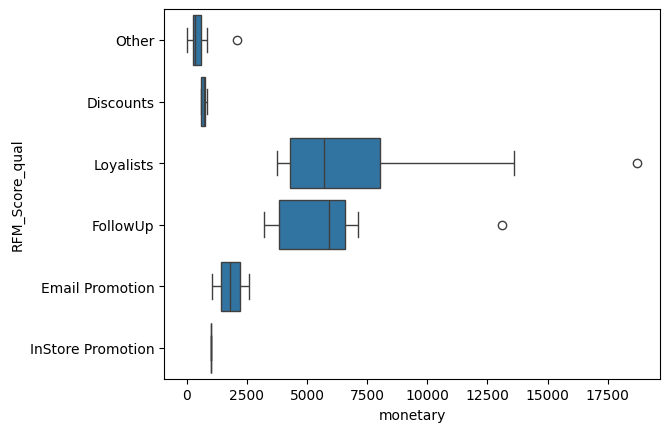

In [49]:
#generate a boxplot for the monetary values split by the Customer Segmentation
import seaborn as sns
sns.boxplot(x=rfm['monetary'], y=rfm['RFM_Score_qual'])

<Axes: xlabel='frequency', ylabel='RFM_Score_qual'>

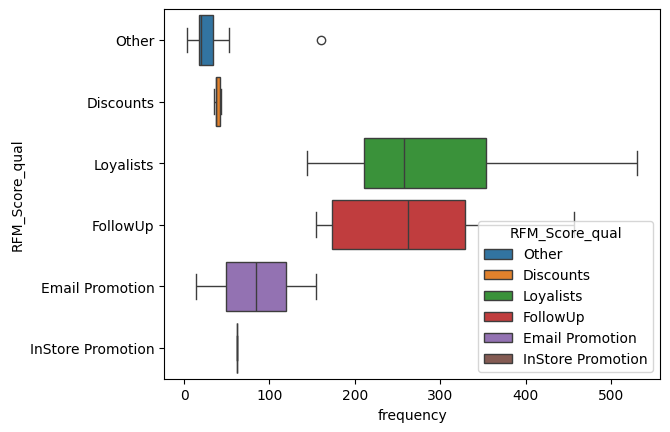

In [51]:
#split the values by frequency of visits to the Store
sns.boxplot(x=rfm['frequency'], y=rfm['RFM_Score_qual'], hue = rfm['RFM_Score_qual'])